In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import sys
sys.path.append("../scripts")

import data_preprocessing as dp
import data_cleaning      as dc
import data_visualization as dv
import data_extraction    as de
import task1
import task2



In [2]:
# Load data from postgres database
query = 'select * from xdr_data;'
df = de.load_data_from_postgres(query)

d:\Personal Files\KIAM Notebooks\KIAM Week 2\notebooks\../scripts\data_extraction.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data successfully imported from postgres


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
dp.information(df)

Rows: 150001, Columns: 55
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 

##### **xDR data has:** 
   - **Rows: 150001** 
   - **Columns: 55**

**From this initial information the data seems to have null values in some of the columns**

In [5]:
dp.check_for_missing_values(df)

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

##### **While checking for missing values some of the columns contain large number of missing values and some do not**

In [6]:
# Drop duplicates
dc.drop_duplicates(df)

Duplicate values removed


In [7]:
# Drop rows with all missing values
dc.drop_missing_rows(df)

Rows with all missing values dropped.


In [8]:
# Drop columns containing more than 25% missing values
dc.drop_columns(df)

Columns dropped due to high percentage of missing values: ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']


In [9]:
# Since Both  ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'] columns are very skewed use median to replace missing values
dc.numerical_columns(df)

Numerical columns: ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'] replaced with the median value


In [10]:
# The remaining columns contain insignificant number of missing values 
dc.drop_nan_values(df)

Missing rows droped


In [58]:
# result after cleaning
df.shape

(146891, 53)

In [12]:
# Summary
dp.statistical_summary(df)

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.468910e+05,146891.000000,146891.000000,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,146891.000000,146891.000000,146891.000000,...,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05
mean,1.014458e+19,499.117189,498.654397,1.052299e+05,2.082017e+14,3.596855e+10,4.844173e+13,95.109605,15.386722,13419.455991,...,1.163341e+07,1.100858e+07,1.162650e+07,1.100286e+07,4.220649e+08,8.290257e+06,4.210038e+08,8.262887e+06,4.112139e+07,4.546628e+08
std,2.892813e+18,288.554839,288.073522,8.092446e+04,1.334711e+09,8.792026e+11,2.238835e+13,531.689938,77.037268,24081.550773,...,6.710450e+06,6.345243e+06,6.724904e+06,6.357359e+06,2.440381e+08,4.781553e+06,2.431448e+08,4.768594e+06,1.127775e+07,2.442080e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.082001e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.852700e+04,2.082014e+14,3.365128e+10,3.546071e+13,34.000000,3.000000,43.000000,...,5.833512e+06,5.516549e+06,5.776626e+06,5.480202e+06,2.103941e+08,4.132622e+06,2.101527e+08,4.144489e+06,3.321835e+07,2.430767e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366369e+10,3.572181e+13,45.000000,5.000000,64.000000,...,1.161638e+07,1.101329e+07,1.164271e+07,1.099939e+07,4.234929e+08,8.294516e+06,4.216332e+08,8.265817e+06,4.114253e+07,4.559702e+08
75%,1.304243e+19,749.000000,750.000000,1.331545e+05,2.082018e+14,3.368344e+10,8.611970e+13,62.000000,11.000000,20023.500000,...,1.744064e+07,1.651411e+07,1.747017e+07,1.650352e+07,6.333301e+08,1.243239e+07,6.313683e+08,1.238204e+07,4.903488e+07,6.657831e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,3.370000e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [13]:
# Summary statistics shows outliers
dc.handle_outliers(df)

<Axes: xlabel='Dur. (ms)', ylabel='Count'>

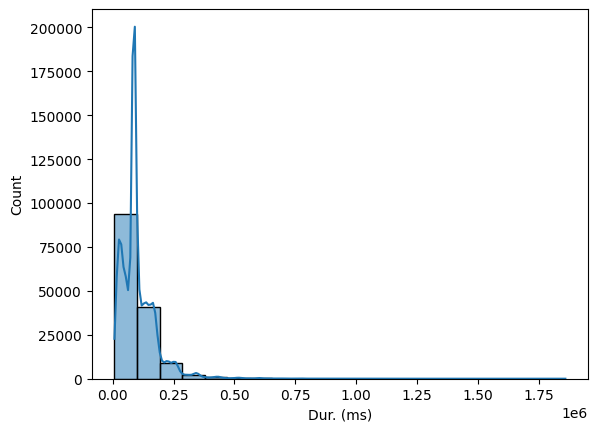

In [14]:
# Duration distribution
sns.histplot(df['Dur. (ms)'], bins=20, kde=True)

<Axes: xlabel='250 Kbps < DL TP < 1 Mbps (%)', ylabel='Count'>

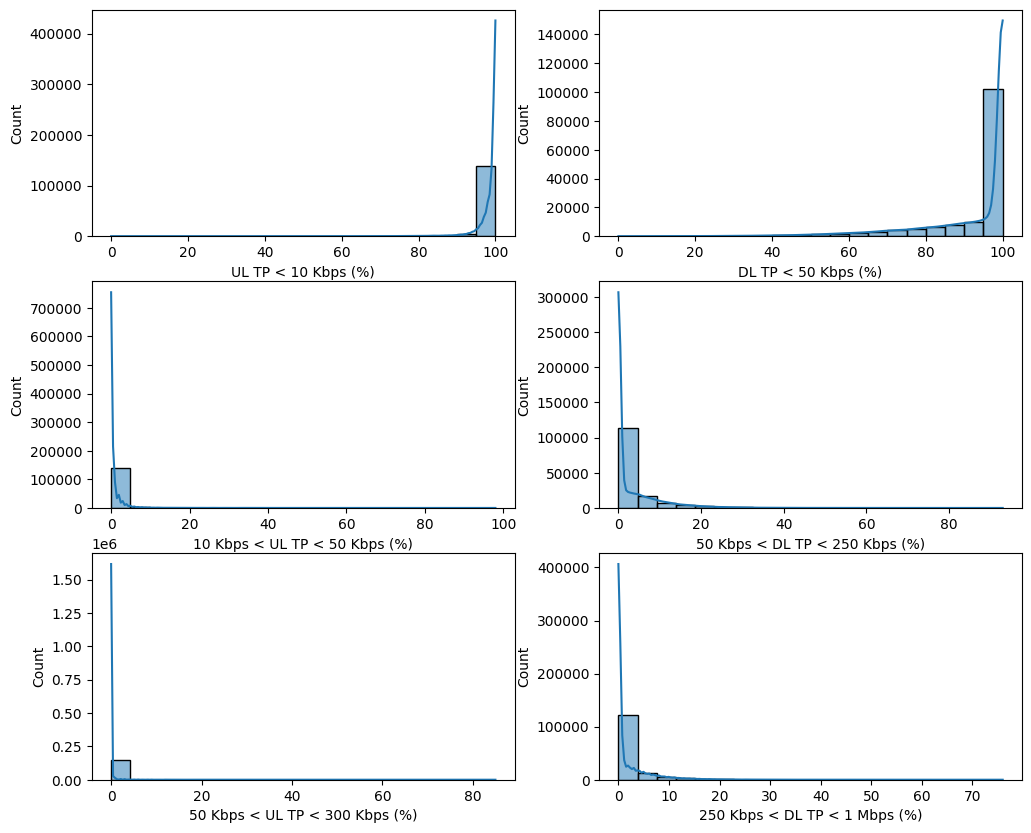

In [15]:
# Duration Ratio for different UL and DL throughput
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(df['10 Kbps < UL TP < 50 Kbps (%)'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df['DL TP < 50 Kbps (%)'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df['UL TP < 10 Kbps (%)'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df['50 Kbps < DL TP < 250 Kbps (%)'], bins=20, kde=True, ax=axes[1, 1])
sns.histplot(df['50 Kbps < UL TP < 300 Kbps (%)'], bins=20, kde=True, ax=axes[2, 0])
sns.histplot(df['250 Kbps < DL TP < 1 Mbps (%)'], bins=20, kde=True, ax=axes[2, 1])

<Axes: xlabel='UL TP > 300 Kbps (%)', ylabel='Count'>

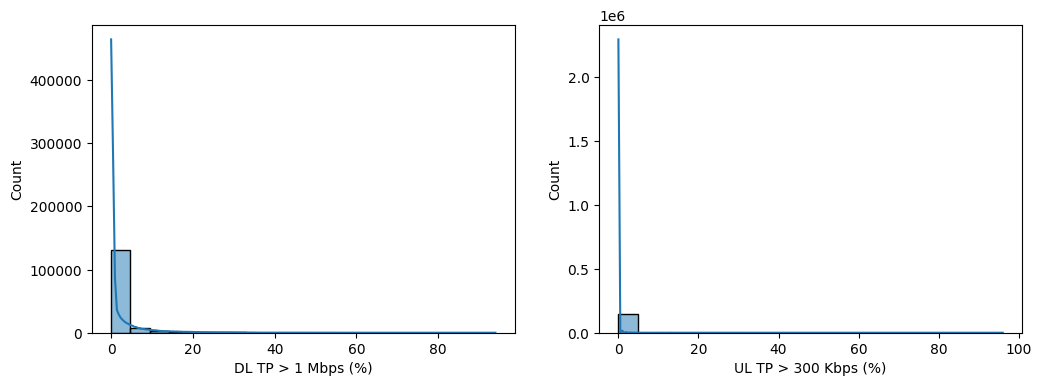

In [16]:
# Continued from the above analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['DL TP > 1 Mbps (%)'], bins=20, kde=True, ax=axes[0])
sns.histplot(df['UL TP > 300 Kbps (%)'], bins=20, kde=True, ax=axes[1])

<Axes: xlabel='Netflix UL (Bytes)', ylabel='Count'>

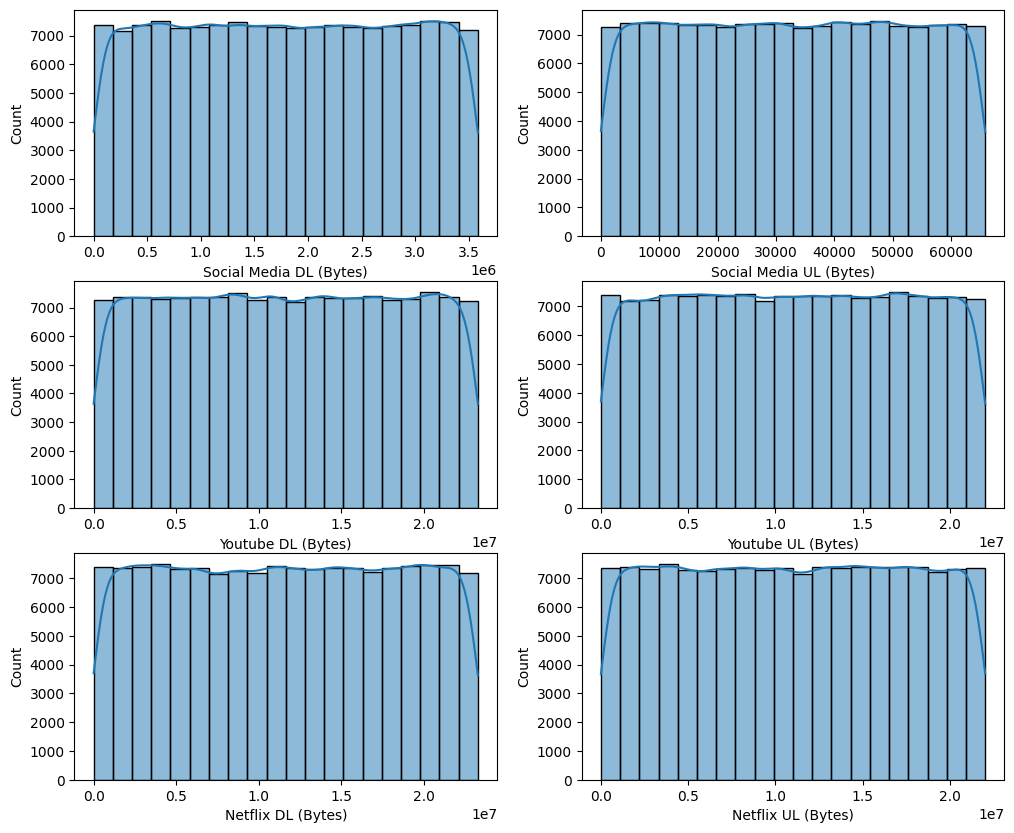

In [17]:
# Application data distribution
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(df['Social Media DL (Bytes)'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df['Social Media UL (Bytes)'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df['Youtube DL (Bytes)'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df['Youtube UL (Bytes)'], bins=20, kde=True, ax=axes[1, 1])
sns.histplot(df['Netflix DL (Bytes)'], bins=20, kde=True, ax=axes[2, 0])
sns.histplot(df['Netflix UL (Bytes)'], bins=20, kde=True, ax=axes[2, 1])

<Axes: xlabel='Gaming UL (Bytes)', ylabel='Count'>

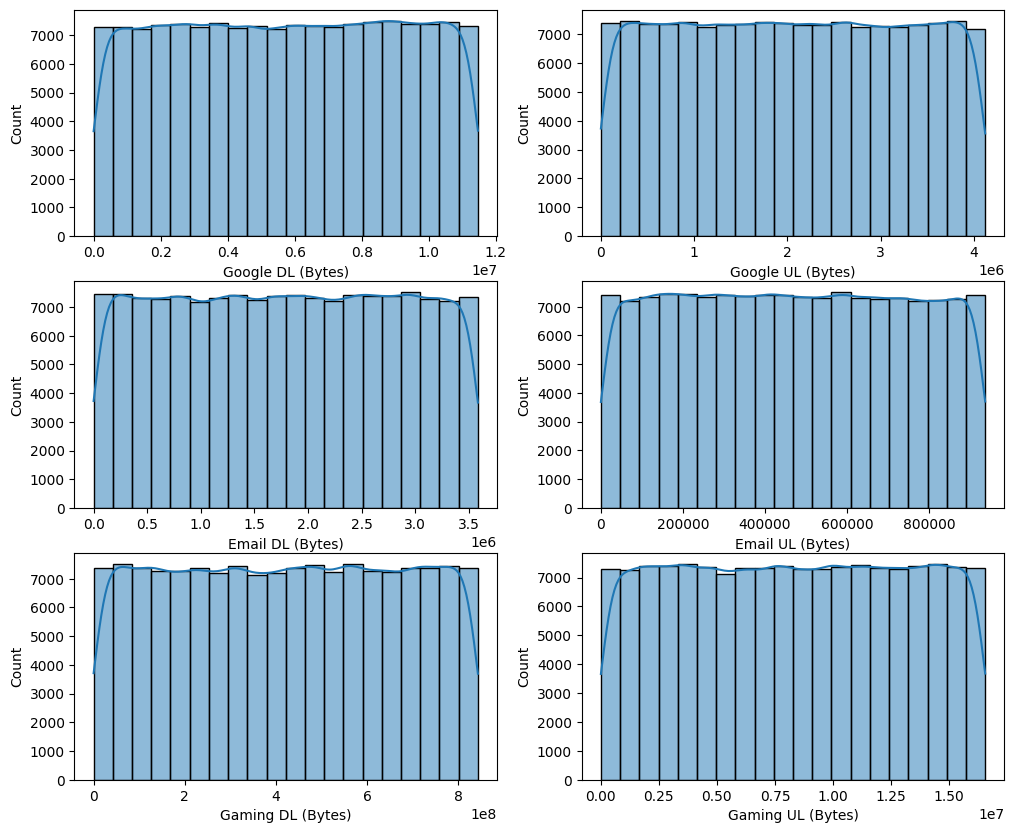

In [18]:
# Application data distribution continued
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(df['Google DL (Bytes)'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df['Google UL (Bytes)'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df['Email DL (Bytes)'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df['Email UL (Bytes)'], bins=20, kde=True, ax=axes[1, 1])
sns.histplot(df['Gaming DL (Bytes)'], bins=20, kde=True, ax=axes[2, 0])
sns.histplot(df['Gaming UL (Bytes)'], bins=20, kde=True, ax=axes[2, 1])

<Axes: xlabel='Other UL (Bytes)', ylabel='Count'>

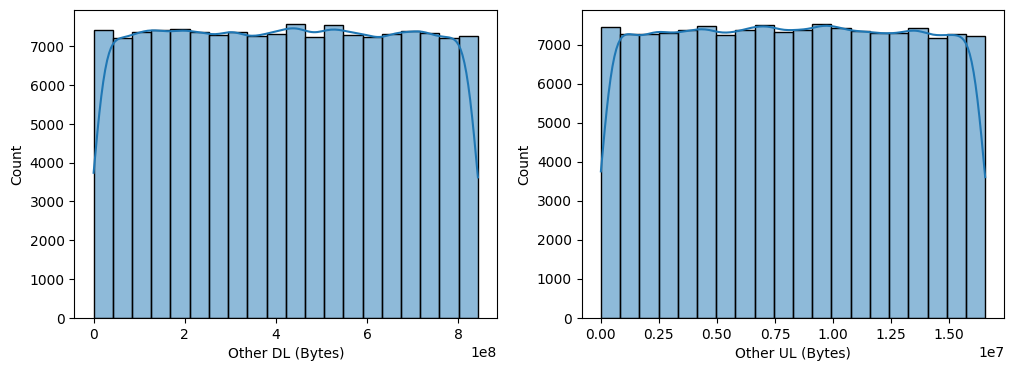

In [19]:
# Application data distribution continued
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Other DL (Bytes)'], bins=20, kde=True, ax=axes[0])
sns.histplot(df['Other UL (Bytes)'], bins=20, kde=True, ax=axes[1])


<Axes: xlabel='Total UL (Bytes)', ylabel='Count'>

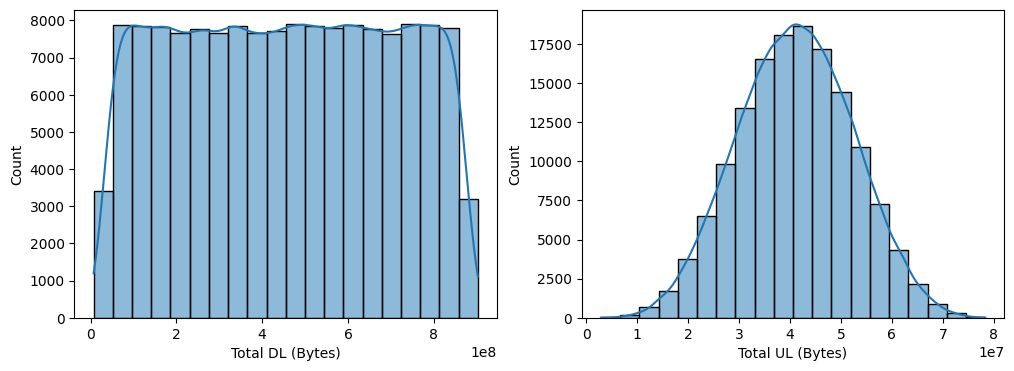

In [20]:
# Total data distribution continued
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Total DL (Bytes)'], bins=20, kde=True, ax=axes[0])
sns.histplot(df['Total UL (Bytes)'], bins=20, kde=True, ax=axes[1])

<Axes: xlabel='DL TP > 1 Mbps (%)', ylabel='Dur. (ms)'>

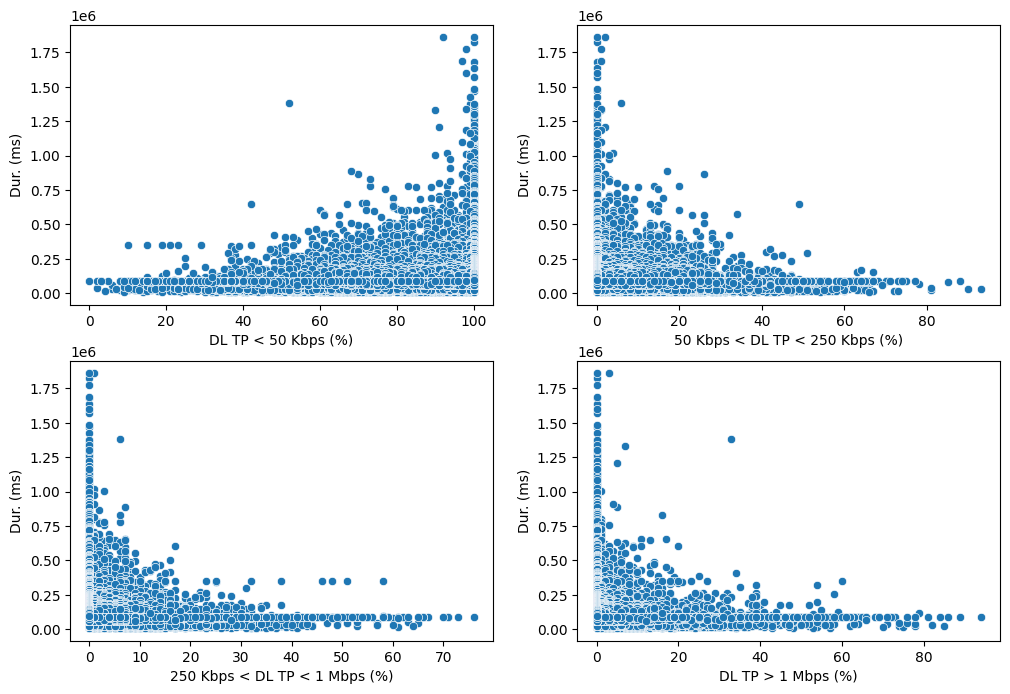

In [21]:
# Bivariate analysis 
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['DL TP < 50 Kbps (%)'],ax=axes[0, 0])
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['50 Kbps < DL TP < 250 Kbps (%)'],ax=axes[0, 1])
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['250 Kbps < DL TP < 1 Mbps (%)'],ax=axes[1, 0])
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['DL TP > 1 Mbps (%)'],ax=axes[1, 1])


<Axes: xlabel='UL TP > 300 Kbps (%)', ylabel='Dur. (ms)'>

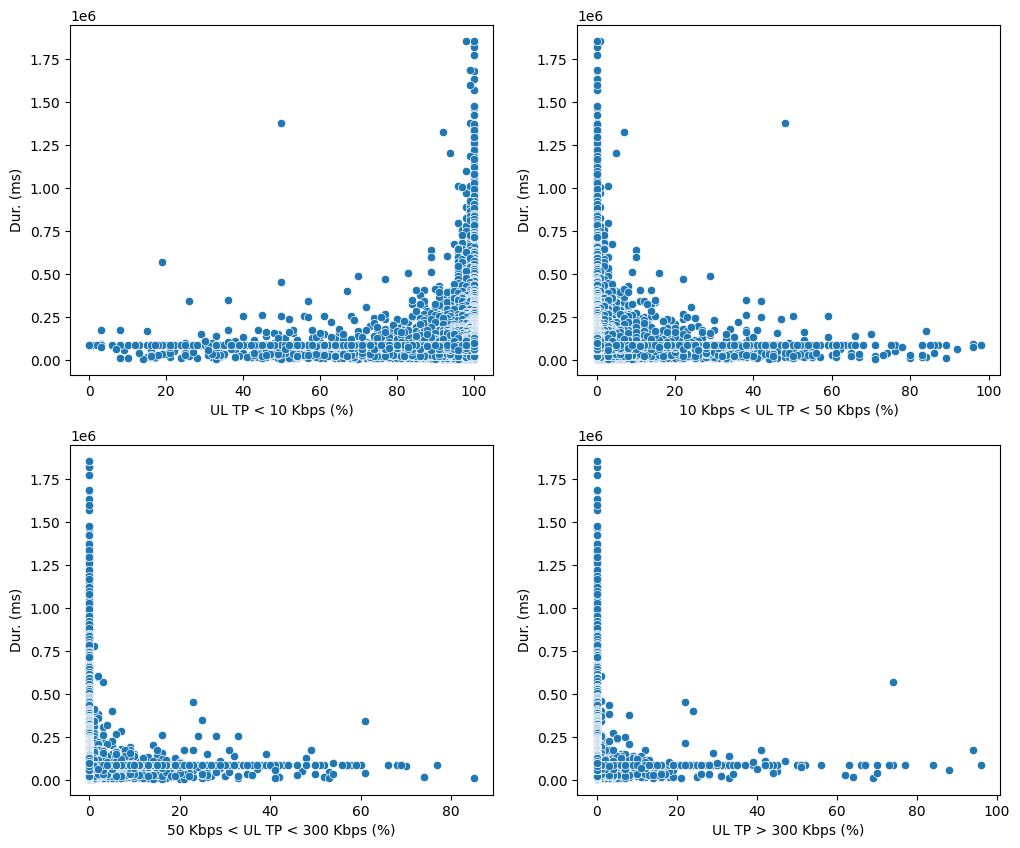

In [22]:
# Bivariate analysis 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['UL TP < 10 Kbps (%)'],ax=axes[0, 0])
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['10 Kbps < UL TP < 50 Kbps (%)'],ax=axes[0, 1])
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['50 Kbps < UL TP < 300 Kbps (%)'],ax=axes[1, 0])
sns.scatterplot(data=df, y=df['Dur. (ms)'], x= df['UL TP > 300 Kbps (%)'],ax=axes[1, 1])

In [23]:
# Top 10 handset Type
df['Handset Type'].value_counts().nlargest(10)

Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64

In [24]:
## Top 3 Handset manufacturer's
df['Handset Manufacturer'].value_counts().nlargest(3)

Handset Manufacturer
Apple      59072
Samsung    39902
Huawei     33755
Name: count, dtype: int64

In [25]:
# group the data to identify top 5 handsets for the top 3 manufacturer's
grouped = df.groupby(['Handset Manufacturer', 'Handset Type']).agg(Count = ('Handset Type', 'count')).reset_index()

In [26]:
# Top 5 Handset Types for Apple
grouped[grouped['Handset Manufacturer'] == 'Apple'].nlargest(5, 'Count')

,Handset Manufacturer,Handset Type,Count
59,Apple,Apple iPhone 6S (A1688),9369
55,Apple,Apple iPhone 6 (A1586),8967
65,Apple,Apple iPhone 7 (A1778),6240
79,Apple,Apple iPhone Se (A1723),5151
72,Apple,Apple iPhone 8 (A1905),4961


In [27]:
# Top 5 Handset Type fro Samsung
grouped[grouped['Handset Manufacturer'] == 'Samsung'].nlargest(5, 'Count')

,Handset Manufacturer,Handset Type,Count
930,Samsung,Samsung Galaxy S8 (Sm-G950F),4404
813,Samsung,Samsung Galaxy A5 Sm-A520F,3673
863,Samsung,Samsung Galaxy J5 (Sm-J530),3664
855,Samsung,Samsung Galaxy J3 (Sm-J330),3431
928,Samsung,Samsung Galaxy S7 (Sm-G930X),3106


In [28]:
# Top 5 Hnadset Type for Huawei
grouped[grouped['Handset Manufacturer'] == 'Huawei'].nlargest(5, 'Count')

,Handset Manufacturer,Handset Type,Count
308,Huawei,Huawei B528S-23A,19373
329,Huawei,Huawei E5180,2062
406,Huawei,Huawei P20 Lite Huawei Nova 3E,2000
405,Huawei,Huawei P20,1471
446,Huawei,Huawei Y6 2018,984


In [29]:
## task 1

# aggregated data
df_aggregated = task1.aggregation(df)
                                    


In [30]:
# Sample aggregated data
df_aggregated.sample(10)

,MSISDN/Number,xDR_sessions,session_duration,total_DL,total_UL,total_social_media,total_youtube,total_Netflix,total_Google,total_Email,total_Gaming,total_Other,total_data
95041,3.376171e+10,4,282018.0,2.005960e+09,168816488.0,5427037.0,78136631.0,85625338.0,24362359.0,10757287.0,1.931789e+09,1.798846e+09,2.174776e+09
57243,3.366486e+10,1,112616.0,8.399974e+08,34658056.0,3309197.0,20769809.0,20135624.0,5008103.0,3634613.0,8.097712e+08,2.116892e+08,8.746555e+08
55510,3.366438e+10,1,14924.0,2.790372e+08,71498690.0,2141771.0,37385207.0,39042591.0,2696119.0,3853005.0,2.490616e+08,5.586222e+08,3.505359e+08
37229,3.365986e+10,1,84377.0,8.457867e+08,49461713.0,2234318.0,10794627.0,43018736.0,4522867.0,2661289.0,8.204419e+08,1.861248e+08,8.952484e+08
25699,3.365071e+10,1,47270.0,8.631103e+08,41867586.0,2299876.0,24572589.0,20533714.0,3776878.0,856060.0,8.524176e+08,2.231184e+08,9.049779e+08
96107,3.376216e+10,2,58275.0,4.710584e+08,115119466.0,4391534.0,59076159.0,49623375.0,19792634.0,4243795.0,4.257212e+08,8.835551e+08,5.861778e+08
103885,3.378285e+10,1,112938.0,6.134055e+08,45836766.0,2570485.0,11147030.0,31760118.0,10560582.0,2147483.0,5.951205e+08,1.280933e+07,6.592423e+08
42232,3.366106e+10,1,87577.0,2.873448e+08,47896721.0,2197103.0,19646946.0,30494542.0,9871330.0,3566573.0,2.552508e+08,4.688587e+08,3.352415e+08
96477,3.376228e+10,1,41530.0,6.225828e+08,26465472.0,2635682.0,19425618.0,10738018.0,8489935.0,2620201.0,5.921106e+08,7.187633e+08,6.490482e+08
66364,3.366778e+10,4,1085213.0,1.231451e+09,184298591.0,10437222.0,79686531.0,68794725.0,26007824.0,8363618.0,1.177848e+09,2.076142e+09,1.415750e+09


In [31]:
# information of the aggregated data
dp.information(df_aggregated)

Rows: 105719, Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105719 entries, 0 to 105718
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSISDN/Number       105719 non-null  float64
 1   xDR_sessions        105719 non-null  int64  
 2   session_duration    105719 non-null  float64
 3   total_DL            105719 non-null  float64
 4   total_UL            105719 non-null  float64
 5   total_social_media  105719 non-null  float64
 6   total_youtube       105719 non-null  float64
 7   total_Netflix       105719 non-null  float64
 8   total_Google        105719 non-null  float64
 9   total_Email         105719 non-null  float64
 10  total_Gaming        105719 non-null  float64
 11  total_Other         105719 non-null  float64
 12  total_data          105719 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 10.5 MB
None


In [32]:
# Summary
dp.statistical_summary(df_aggregated)

,MSISDN/Number,xDR_sessions,session_duration,total_DL,total_UL,total_social_media,total_youtube,total_Netflix,total_Google,total_Email,total_Gaming,total_Other,total_data
count,1.057190e+05,105719.000000,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05,1.057190e+05
mean,3.686153e+10,1.389447,1.462114e+05,6.317300e+08,5.713601e+07,2.539549e+06,3.145986e+07,3.144231e+07,1.084878e+07,3.138870e+06,5.979559e+08,5.964435e+08,6.888661e+08
std,1.036359e+12,0.796173,1.845391e+05,4.609209e+08,3.527180e+07,1.891491e+06,2.109820e+07,2.106787e+07,7.479944e+06,2.202782e+06,4.457847e+08,4.454280e+08,4.869964e+08
min,3.360100e+10,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.563000e+03,1.574460e+05,1.845690e+05,4.033000e+04,1.817600e+04,3.063580e+05,1.490450e+05,3.324901e+07
25%,3.365088e+10,1.000000,7.272900e+04,3.142406e+08,3.637849e+07,1.209786e+06,1.860355e+07,1.855068e+07,5.932246e+06,1.673030e+06,2.875319e+08,2.849110e+08,3.579501e+08
50%,3.366364e+10,1.000000,1.031110e+05,5.693797e+08,4.676298e+07,2.301182e+06,2.676628e+07,2.669009e+07,9.572481e+06,2.795232e+06,5.413234e+08,5.388203e+08,6.169335e+08
75%,3.368340e+10,2.000000,1.727990e+05,8.062981e+08,6.550410e+07,3.303162e+06,3.784336e+07,3.790522e+07,1.318503e+07,3.840928e+06,7.763347e+08,7.738994e+08,8.564738e+08
max,3.370000e+14,18.000000,1.855375e+07,8.156743e+09,7.295774e+08,4.337478e+07,4.529588e+08,3.995191e+08,1.521919e+08,4.241878e+07,7.749432e+09,8.167878e+09,8.846226e+09


In [33]:
#segment the users into the top five decile classes 
df_aggregated['decile_class'] = pd.qcut(df_aggregated['session_duration'], 5, labels=False)

In [34]:
# View sample data
df_aggregated['decile_class'].head()

0    2
1    3
2    3
3    0
4    0
Name: decile_class, dtype: int64

In [35]:
# total data (DL+UL) per decile class. 
grouped_per_decile = df_aggregated.groupby('decile_class').agg(total_data_per_decile =('total_data','sum'), 
                                                        ).reset_index()
grouped_per_decile

,decile_class,total_data_per_decile
0,0,1.143024e+13
1,1,1.227127e+13
2,2,1.156663e+13
3,3,1.377434e+13
4,4,2.378375e+13


<Axes: xlabel='total_Google', ylabel='Count'>

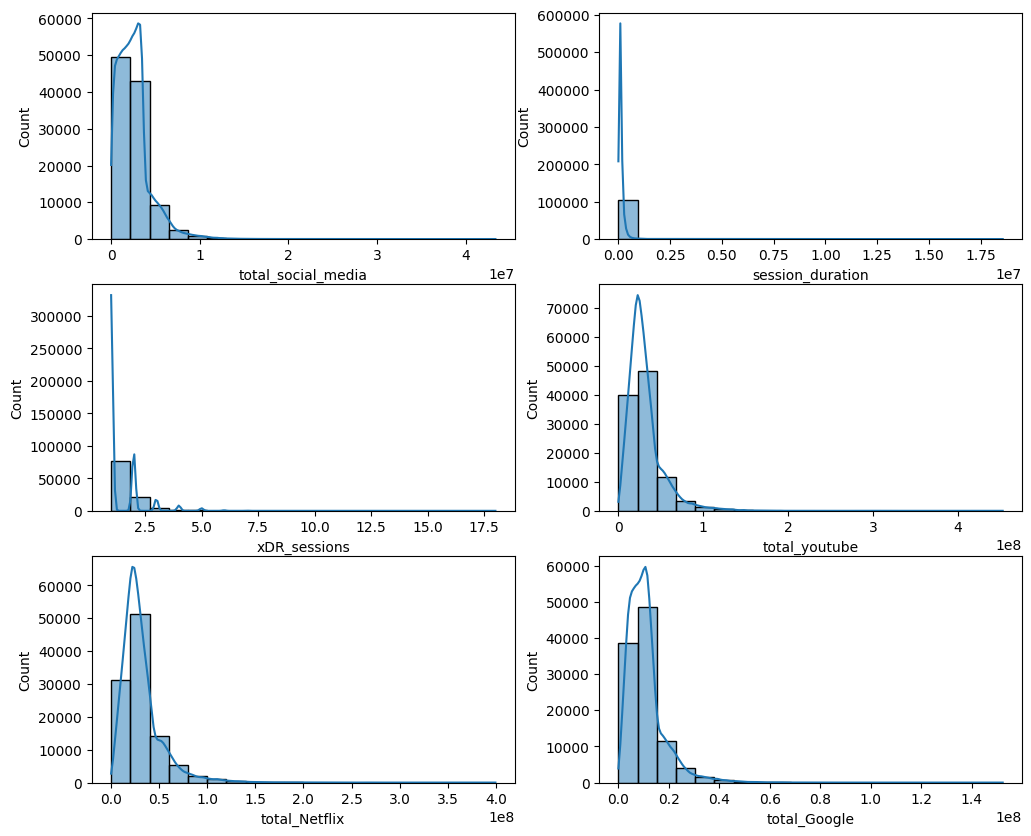

In [36]:
# Graphical Univariate analysis for the aggregated data
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(df_aggregated['xDR_sessions'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df_aggregated['session_duration'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df_aggregated['total_social_media'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df_aggregated['total_youtube'], bins=20, kde=True, ax=axes[1, 1])
sns.histplot(df_aggregated['total_Netflix'], bins=20, kde=True, ax=axes[2, 0])
sns.histplot(df_aggregated['total_Google'], bins=20, kde=True, ax=axes[2, 1])

<Axes: xlabel='total_data', ylabel='Count'>

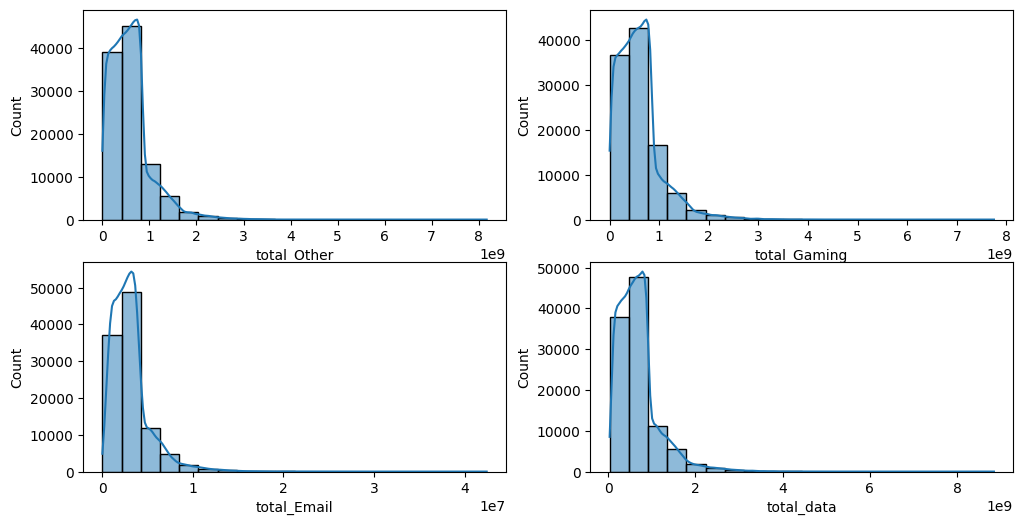

In [37]:
# Graphical Univariate analysis for the aggregated data continued
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.histplot(df_aggregated['total_Email'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df_aggregated['total_Gaming'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df_aggregated['total_Other'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df_aggregated['total_data'], bins=20, kde=True, ax=axes[1, 1])


<Axes: xlabel='total_Google', ylabel='total_data'>

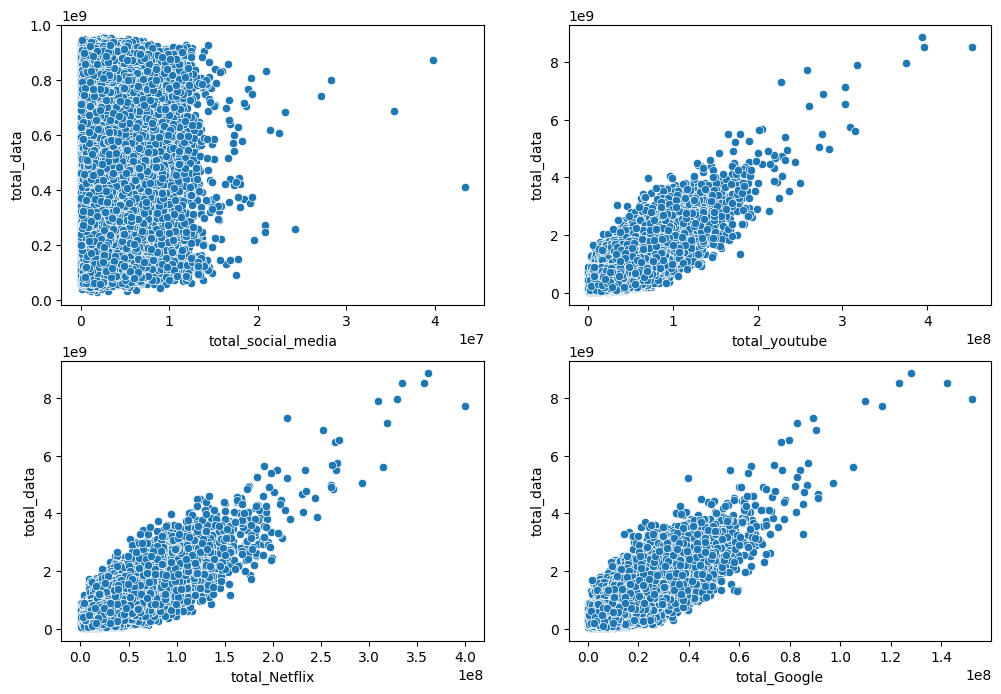

In [38]:
# Bivariate analysis for grouped data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(data=df_aggregated, y=df['total_data'], x= df_aggregated['total_social_media'],ax=axes[0, 0])
sns.scatterplot(data=df_aggregated, y=df_aggregated['total_data'], x= df_aggregated['total_youtube'],ax=axes[0, 1])
sns.scatterplot(data=df_aggregated, y=df_aggregated['total_data'], x= df_aggregated['total_Netflix'],ax=axes[1, 0])
sns.scatterplot(data=df_aggregated, y=df_aggregated['total_data'], x= df_aggregated['total_Google'],ax=axes[1, 1])


<Axes: xlabel='total_Other', ylabel='total_data'>

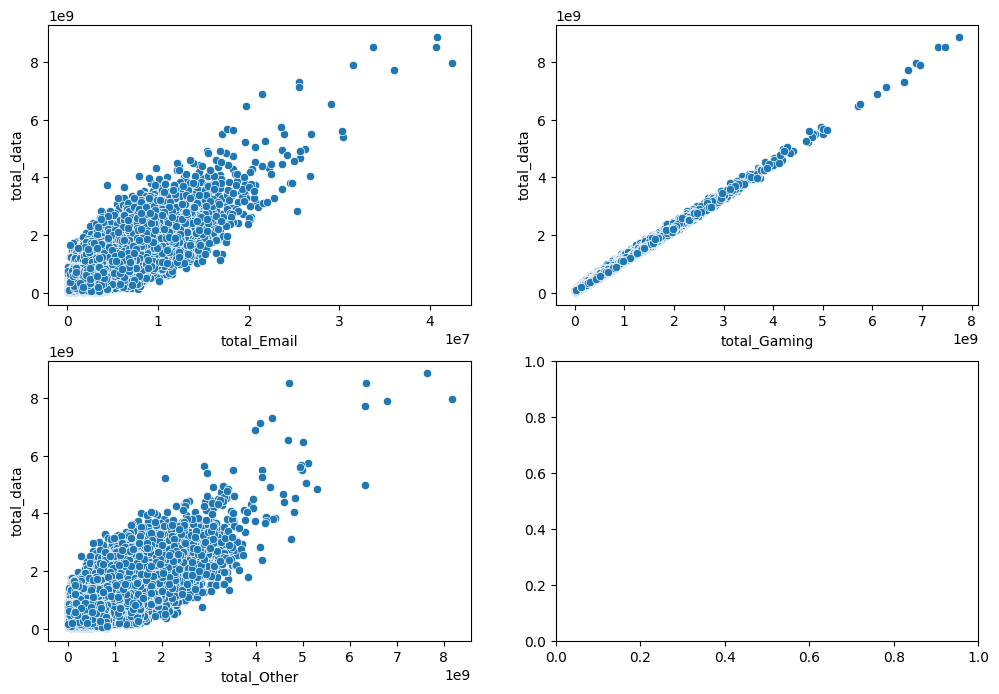

In [39]:
# Bivariate analysis for grouped data continued
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(data=df_aggregated, y=df_aggregated['total_data'], x= df_aggregated['total_Email'],ax=axes[0, 0])
sns.scatterplot(data=df_aggregated, y=df_aggregated['total_data'], x= df_aggregated['total_Gaming'],ax=axes[0, 1])
sns.scatterplot(data=df_aggregated, y=df_aggregated['total_data'], x= df_aggregated['total_Other'],ax=axes[1, 0])

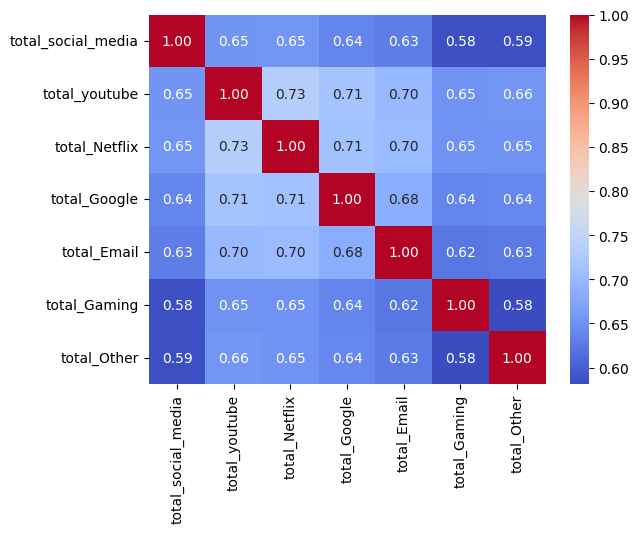

In [40]:
dv.correlation(df_aggregated)

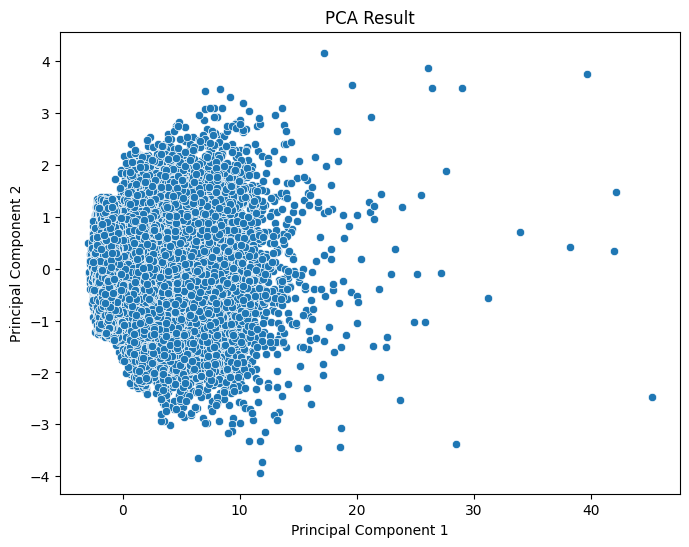

In [41]:
# PCA analysis
task1.pca(df_aggregated)

**Task 2**

In [42]:
# Extract engagement metrics from df_aggregated
df_engagement_metrics = task2.engagement_metrics(df_aggregated)



In [44]:
# Top 10 Customers per Engagement Metric
task2.top_10_customers(df_engagement_metrics)


Top 10 Customers by Session Frequency:
        MSISDN/Number  sessions_frequency  session_duration  total_traffic
13381   3.362632e+10                  18         8791927.0   7.971167e+09
6353    3.361489e+10                  17         9966898.0   8.846226e+09
13037   3.362578e+10                  17        18553754.0   8.499621e+09
36669   3.365973e+10                  16         4035428.0   7.705863e+09
75564   3.367588e+10                  15         4865947.0   7.891111e+09
91949   3.376054e+10                  15         9279434.0   8.514774e+09
64472   3.366716e+10                  13         8744914.0   5.618394e+09
653     3.360313e+10                  12         6287761.0   4.976195e+09
1258    3.360452e+10                  12         5207990.0   5.487855e+09
13845   3.362708e+10                  12         4703516.0   5.754731e+09
Top 10 Customers by Session Duration:
        MSISDN/Number  sessions_frequency  session_duration  total_traffic
13037   3.362578e+10             

In [45]:
# K-means Clustering (k=3)
task2.kmeans_clustering(df_engagement_metrics)

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster
0,3.360100e+10,1,116720.0,8.786906e+08,0
1,3.360100e+10,1,181230.0,1.568596e+08,0
2,3.360100e+10,1,134969.0,5.959665e+08,0
3,3.360101e+10,1,49878.0,4.223207e+08,0
4,3.360101e+10,2,37104.0,1.457411e+09,2
...,...,...,...,...,...
105714,3.378997e+10,1,160461.0,2.081231e+08,0
105715,3.378998e+10,2,210389.0,1.094693e+09,2
105716,3.379000e+10,1,8810.0,7.146416e+08,0
105717,3.379000e+10,1,140988.0,4.803073e+08,0


In [46]:
df_cluster_summary = df_engagement_metrics.groupby('cluster').agg({'sessions_frequency': ['min','max','mean','sum'],
                                                  'session_duration': ['min','max','mean','sum'],
                                                  'total_traffic': ['min','max','mean','sum']})

df_cluster_summary

sessions_frequency                      session_duration              \
                       min max      mean    sum              min         max   
cluster                                                                        
0                        1   2  1.026292  81073           7142.0    869830.0   
1                        1  18  4.354220  15427          66594.0  18553754.0   
2                        1   4  2.173900  50391          18235.0   1480875.0   

                                     total_traffic                \
                  mean           sum           min           max   
cluster                                                            
0        103428.334422  8.170425e+09    33249009.0  9.507607e+08   
1        651137.897262  2.306982e+09   370420998.0  8.846226e+09   
2        214836.759491  4.979916e+09   118487293.0  2.512802e+09   

                                     
                 mean           sum  
cluster                              
0        4.948853e+08  3.909396e+13  
1        2.264106e+09  8.021728e+12  
2        1.109169e+09  2.571054e+13

- **Users in cluster_0 are less engaged out of the 3 clusters**
- **Users in cluster_1 are highly engaged**
- **Users in cluster_2 are medium**


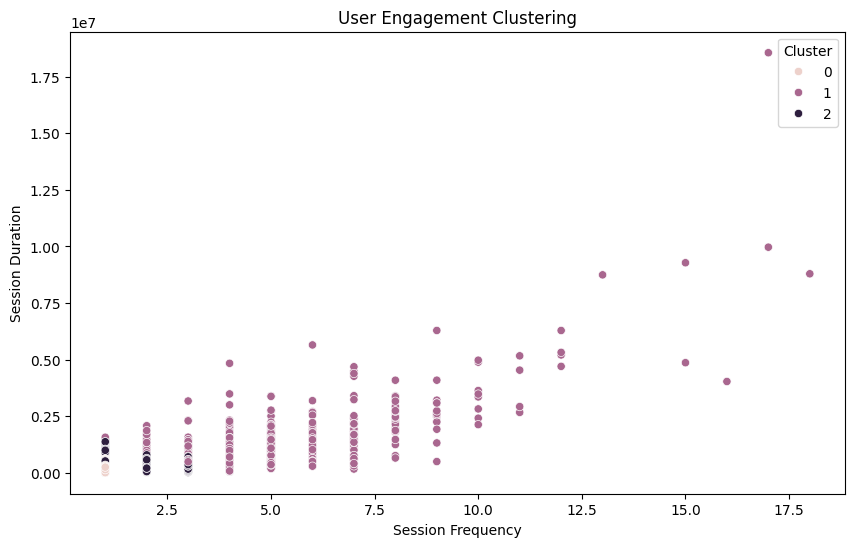

In [47]:
#Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_engagement_metrics, x='sessions_frequency', y='session_duration', hue='cluster')
plt.title('User Engagement Clustering')
plt.xlabel('Session Frequency')
plt.ylabel('Session Duration')
plt.legend(title='Cluster')


In [49]:
# Aggregate Total Traffic per Application
applications = ['social_media', 'Google', 'Email', 'youtube', 'Netflix', 'Gaming', 'Other']
application_traffic = {}
for app in applications:
    traffic_col = f'total_{app}'
    app_traffic = df_aggregated.groupby('MSISDN/Number')[traffic_col].sum()
    application_traffic[app] = app_traffic.sum()

application_traffic


{'social_media': np.float64(268478589410.0),
 'Google': np.float64(1146921653914.0),
 'Email': np.float64(331838236748.0),
 'youtube': np.float64(3325904550858.0),
 'Netflix': np.float64(3324049323727.0),
 'Gaming': np.float64(63215294882199.0),
 'Other': np.float64(63055410744638.0)}

In [50]:
top_3_apps = sorted(application_traffic.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_apps_df = pd.DataFrame(top_3_apps, columns=['Application', 'Total Traffic'])
top_3_apps_df

,Application,Total Traffic
0,Gaming,6.321529e+13
1,Other,6.305541e+13
2,youtube,3.325905e+12


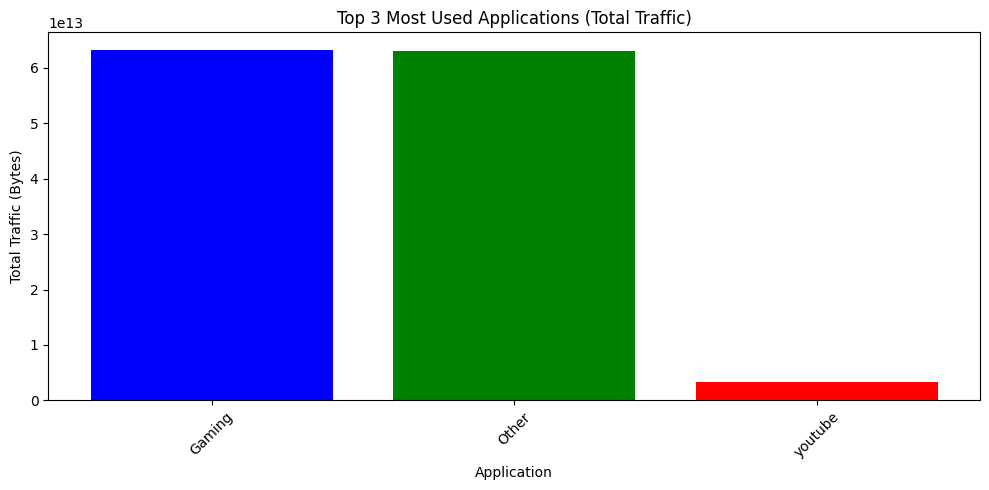

In [51]:
#Plot Top 3 Most Used Applications
plt.figure(figsize=(10, 5))
plt.bar(top_3_apps_df['Application'], top_3_apps_df['Total Traffic'], color=['blue', 'green', 'red'])
plt.title('Top 3 Most Used Applications (Total Traffic)')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.xticks(rotation=45)
plt.tight_layout()

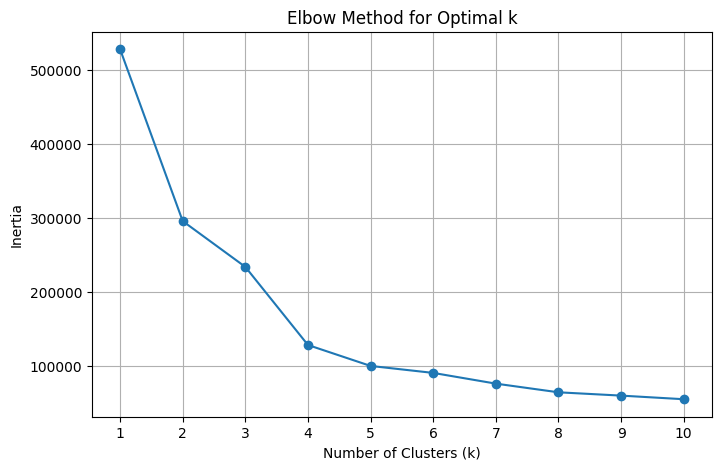

In [52]:
# Optimal Number of Clusters using Elbow Method
inertia = []
for k in range(1, 11):
    # Normalize
    scaler = StandardScaler()
    metrics_scaled = scaler.fit_transform(df_engagement_metrics)
    #Kmeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(metrics_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)


**The Elbow plot shows the optimal number of clusters for the given data is 6 (k=6)
The values after 6 do not result in any signficant difference in the user segmentation**

In [53]:
# Use the optimal k value to cluster engagements

#Normalizarion
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(df_engagement_metrics)

#K-means Clustering (k=3)
kmeans = KMeans(n_clusters=6, random_state=0)
df_engagement_metrics['cluster'] = kmeans.fit_predict(metrics_scaled)

In [54]:
# Optimal Clustering
df_cluster_summary = df_engagement_metrics.groupby('cluster').agg({'sessions_frequency': ['min','max','mean','sum'],
                                                  'session_duration': ['min','max','mean','sum'],
                                                  'total_traffic': ['min','max','mean','sum']})

df_cluster_summary

sessions_frequency                      session_duration              \
                       min max      mean    sum              min         max   
cluster                                                                        
0                        1   2  1.026293  81072           7142.0    869830.0   
1                        1   4  2.918419  14989          31958.0   1573420.0   
2                        3  18  7.779528    988        1718011.0  18553754.0   
3                        1   1  1.000000      1         253030.0    253030.0   
4                        2   9  4.439825  12174          66594.0   2113014.0   
5                        1   3  2.012341  37667          18235.0   1042254.0   

                                    total_traffic                              \
                 mean           sum           min           max          mean   
cluster                                                                         
0        1.034264e+05  8.170172e+09    33249009.0  9.507607e+08  4.948840e+08   
1        3.618577e+05  1.858501e+09   177006936.0  2.545439e+09  1.471585e+09   
2        3.150103e+06  4.000631e+08   743040941.0  8.846226e+09  3.983817e+09   
3        2.530300e+05  2.530300e+05   596287824.0  5.962878e+08  5.962878e+08   
4        5.733755e+05  1.572196e+09   542935647.0  4.731467e+09  2.327235e+09   
5        1.846425e+05  3.456138e+09   118487293.0  1.855010e+09  1.030398e+09   

                       
                  sum  
cluster                
0        3.909336e+13  
1        7.558060e+12  
2        5.059447e+11  
3        5.962878e+08  
4        6.381278e+12  
5        1.928699e+13